
# Polynomial Regression



## Objectives


*   Use scikit-learn to implement Polynomial Regression
*   Create a model, train it, test it and use the model


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [2]:
df = pd.read_csv("/content/FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [4]:
df.shape

(14253, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 14253 non-null  int64  
 1   MAKE                      14253 non-null  object 
 2   MODEL                     14253 non-null  object 
 3   VEHICLECLASS              14253 non-null  object 
 4   ENGINESIZE                14253 non-null  float64
 5   CYLINDERS                 14253 non-null  int64  
 6   TRANSMISSION              14253 non-null  object 
 7   FUELTYPE                  14253 non-null  object 
 8   FUELCONSUMPTION_CITY      14253 non-null  float64
 9   FUELCONSUMPTION_HWY       14253 non-null  float64
 10  FUELCONSUMPTION_COMB      14253 non-null  float64
 11  FUELCONSUMPTION_COMB_MPG  14253 non-null  int64  
 12  CO2EMISSIONS              14253 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 1.4+ MB


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000
mean,2007.591875,3.477850,5.991230,12.934456,8.831348,11.089637,27.285624,248.790149
std,4.132870,1.311102,1.774154,3.541439,2.338169,2.969484,7.425910,59.077190
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,2.400000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,3.400000,6.000000,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,4.400000,8.000000,14.900000,10.200000,12.800000,31.000000,285.000000
max,2014.000000,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


Let's select some features that we want to use for regression.


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,1.6,4,8.1,186
1,1.6,4,7.6,175
2,3.2,6,10.0,230
3,3.5,6,11.5,264
4,1.8,4,8.6,198
5,1.8,4,8.2,189
6,1.8,4,8.3,191
7,3.0,6,11.6,267
8,3.2,6,11.7,269


Let's plot Emission values with respect to Engine size:


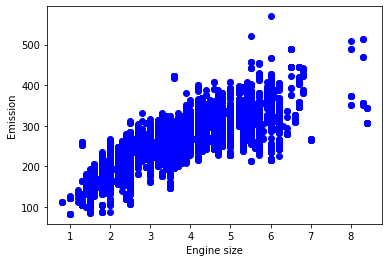

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynomial regression</h2>


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  1.8 ,  3.24],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).




 Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x\_1$, $x\_1^2$ with $x\_2$, and so on. Then the 2nd degree equation would be turn into:

$$y = b + \theta\_1  x\_1 + \theta\_2 x\_2$$

Now, we can deal with it as a 'linear regression' problem. 

so we can use **LinearRegression()** function to solve it:


In [12]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         59.64638924 -2.92983567]]
Intercept:  [81.8026796]


 **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
 Let's plot the data.



Text(0, 0.5, 'Emission')

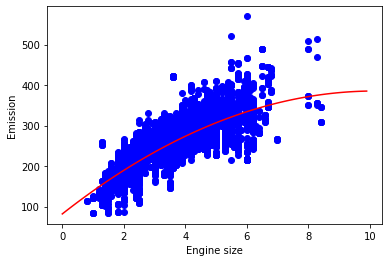

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>


In [14]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 25.04
Residual sum of squares (MSE): 1101.60
R2-score: 0.68


<h2 id="practice">Polynomial regression with the dataset but this time with degree three (cubic).</h2>
Does it result in better accuracy?


Coefficients:  [[ 0.         63.86546404 -4.06192892  0.09293592]]
Intercept:  [77.08439246]
Mean absolute error: 25.04
Residual sum of squares (MSE): 1101.18
R2-score: 0.68


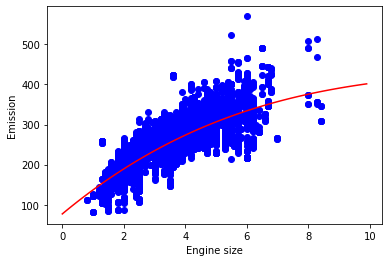

In [15]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )


### Thank You !